# Python Exercise : Logistic Regression

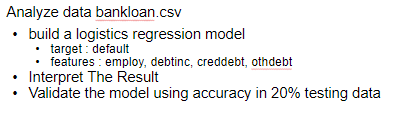

In [1]:
import pandas as pd
import numpy as np

In [ ]:
bankloan = pd.read_csv('bankloan.csv')

In [ ]:
bankloan

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1
1,27,1,10,6,31,17.3,1.362202,4.000798,0
2,40,1,15,14,55,5.5,0.856075,2.168925,0
3,41,1,15,14,120,2.9,2.658720,0.821280,0
4,24,2,2,0,28,17.3,1.787436,3.056564,1
...,...,...,...,...,...,...,...,...,...
695,36,2,6,15,27,4.6,0.262062,0.979938,1
696,29,2,6,4,21,11.5,0.369495,2.045505,0
697,33,1,15,3,32,7.6,0.491264,1.940736,0
698,45,1,19,22,77,8.4,2.302608,4.165392,0


In [ ]:
fitur = ['employ', 'debtinc', 'creddebt', 'othdebt']
target = ['default']

In [ ]:
X = bankloan[fitur]
y = bankloan[target]

In [ ]:
X.describe()

,employ,debtinc,creddebt,othdebt
count,700.000000,700.000000,700.000000,700.000000
mean,8.388571,10.260571,1.553553,3.058209
std,6.658039,6.827234,2.117197,3.287555
min,0.000000,0.400000,0.011696,0.045584
25%,3.000000,5.000000,0.369059,1.044178
50%,7.000000,8.600000,0.854869,1.987567
75%,12.000000,14.125000,1.901955,3.923065
max,31.000000,41.300000,20.561310,27.033600


> ## Modeling

In [ ]:
import statsmodels.api as sm

In [ ]:
sm_logit = sm.Logit(y,sm.add_constant(X))
result = sm_logit.fit()

Optimization terminated successfully.
         Current function value: 0.411165
         Iterations 7


In [ ]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:                default   No. Observations:                  700
Model:                          Logit   Df Residuals:                      695
Method:                           MLE   Df Model:                            4
Date:                Thu, 20 Nov 2025   Pseudo R-squ.:                  0.2844
Time:                        21:35:34   Log-Likelihood:                -287.82
converged:                       True   LL-Null:                       -402.18
Covariance Type:            nonrobust   LLR p-value:                 2.473e-48
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.2302      0.236     -5.210      0.000      -1.693      -0.767
employ        -0.2436      0.029     -8.456      0.000      -0.300      -0.187
debtinc        0.0885      0.021      4.200      0.0

> ## Collinearity

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
calc_vif(X)

,variables,VIF
0,employ,2.222753
1,debtinc,3.045977
2,creddebt,2.816577
3,othdebt,4.116876


the is no problem in multicollinearity

> ## Model Interpretation

In [ ]:
np.exp(0.2436*1)
# B1 = -0.2436 : When employment increase one year and no changes in another variable, the risk to become default most likely decrease 1.27 times

np.float64(1.2758338948511923)

In [ ]:
np.exp(0.0885*1)
# B2 = 0.0885 : When ratio debt to income increase one and no changes in another variable, the risk to become default most likely increase 1.09 times

np.float64(1.0925342526104793)

In [ ]:
np.exp(0.5041*5)
# B3 = 0.5041 :  When creddebt increase 5$ and no changes in another variable, the risk to become default most likely increase 12.43 times

np.float64(12.434812515742879)

LLR-Test:
<br>
B1, B2, B3, B4 : P-Value of the Log-Likelihood Ratio is below 0.05. We have enough evidence that minimal either employ, debtinc, creddebt, othdebt have significant effect to credit default rate.
<br>
Wald Test:
1. B0 : P-Value of the partial test is below 0.05. We need B0 in the model
1. B1 : P-Value of the partial test is below 0.05. With significant level of 5%, we have enough evidence that employ decrease default rate
1. B2 : P-Value of the partial test is below 0.05. With significant level of 5%, we have enough evidence that debtinc increase default rate.
1. B3 : P-Value of the partial test is below 0.05. With significant level of 5%, we have enough evidence that creddebt increase default rate.
1. B3 : P-Value of the partial test is greater than 0.05. With significant level of 5%, we dont have enough evidence that othdebt has significant effect to default rate

Parameter Estimate:
1. B1 = -0.2436 : Employment decrease default rate. When employment increase one year and no changes in another variable, the risk to become default most likely decrease 1.27 times
1. B2 = 0.0885 : Ratio debt to income increase default rate. When ratio debt to income increase one and no changes in another variable, the risk to become default most likely increase 1.09 times
1. B3 = 0.5041 :  creddebt increase default rate. When creddebt increase 5$ and no changes in another variable, the risk to become default most likely increase 12.43 times
1. It is strongly recommended to interprete within the interval of predictor.

Coefficient Determination:
<br>
Pseudo R-Square = 28.44% : This model can explain 28.33% variation of default rate.

> ## Validation

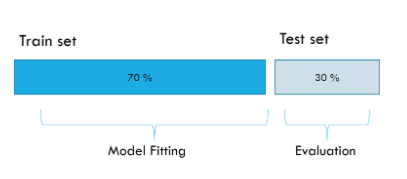

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    stratify = y,
    test_size = 0.2,
    random_state = 2020)

In [ ]:
sm_logit_train = sm.Logit(y_train,sm.add_constant(X_train))
result_train = sm_logit_train.fit()

Optimization terminated successfully.
         Current function value: 0.411145
         Iterations 7


In [ ]:
 y_predict_proba = result_train.predict(sm.add_constant(X_test))
 y_predict_class = np.where(y_predict_proba>0.5,1,0)

In [ ]:
print('model accuracy in test dataset:',accuracy_score(y_test,y_predict_class))

model accuracy in test dataset: 0.8214285714285714


This model is able to predict default correctly about 8 of 10 people

# Python Exercise : KNN

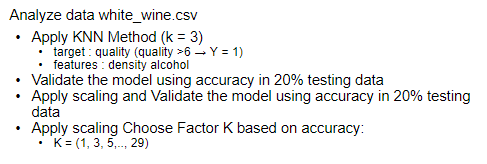

In [ ]:
wine = pd.read_csv('white_wine.csv')

In [ ]:
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6.0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...
515,6.1,0.31,0.26,2.2,0.051,28.0,167.0,0.9926,3.37,0.47,10.4,6.0
516,6.8,0.18,0.37,1.6,0.055,47.0,154.0,0.9934,3.08,0.45,9.1,5.0
517,7.4,0.15,0.42,1.7,0.045,49.0,154.0,0.9920,3.00,0.60,10.4,6.0
518,5.9,0.13,0.28,1.9,0.050,20.0,78.0,0.9918,3.43,0.64,10.8,6.0


In [ ]:
import seaborn as sns

In [ ]:
wine['label'] = np.where(wine['quality']>6,1,0)

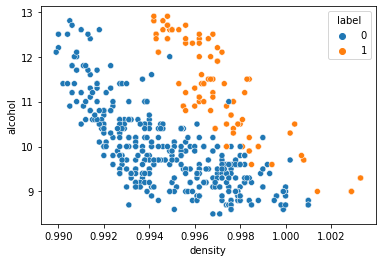

In [ ]:
sns.scatterplot(x = 'density', y = 'alcohol',data = wine, hue = 'label')

In [ ]:
wine[['alcohol','density']].isnull().sum()

,0
alcohol,1
density,0


In [ ]:
wine['alcohol'].fillna(wine['alcohol'].mean(),inplace = True)

/tmp/ipython-input-3538150794.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  wine['alcohol'].fillna(wine['alcohol'].mean(),inplace = True)


In [ ]:
X = wine[['alcohol','density']]
y = wine['label']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    stratify = y, # stratified random sampling
    test_size = 0.2,
    random_state = 2020) # make the result consistent

> ## Without Scaling

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train,y_train)
y_predict_class = knn.predict(X_test)

In [ ]:
print('model accuracy in test dataset:',accuracy_score(y_test,y_predict_class))

model accuracy in test dataset: 0.9038461538461539


> ## With Scaling

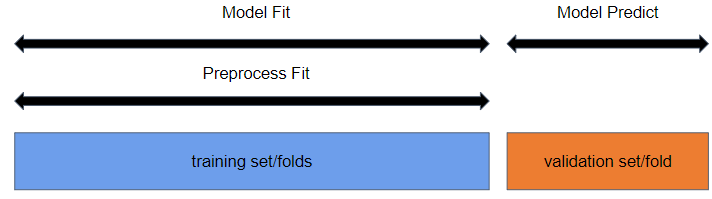

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()
scaler.fit(X_train) # preprocess fit
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train_scaled,y_train) # model fit
y_predict_class = knn.predict(X_test_scaled) # model predict

In [ ]:
print('model accuracy in test dataset:',accuracy_score(y_test,y_predict_class))

model accuracy in test dataset: 0.9807692307692307


The accuracy improved from 0.9038 to 0.9876 after we applied scaling.

> ## Choose Factor K

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
k = range(1,30,2)
testing_accuracies = []
training_accuracies = []
score = 0

for i in k:
  knn = KNeighborsClassifier(n_neighbors = i)
  knn.fit(X_train_scaled,y_train)

  y_predict_train = knn.predict(X_train_scaled)
  training_accuracies.append(accuracy_score(y_train,y_predict_train))

  y_predict_test = knn.predict(X_test_scaled)
  acc_score = accuracy_score(y_test,y_predict_test)
  testing_accuracies.append(acc_score)

  if score < acc_score:
    score = acc_score
    best_k = i

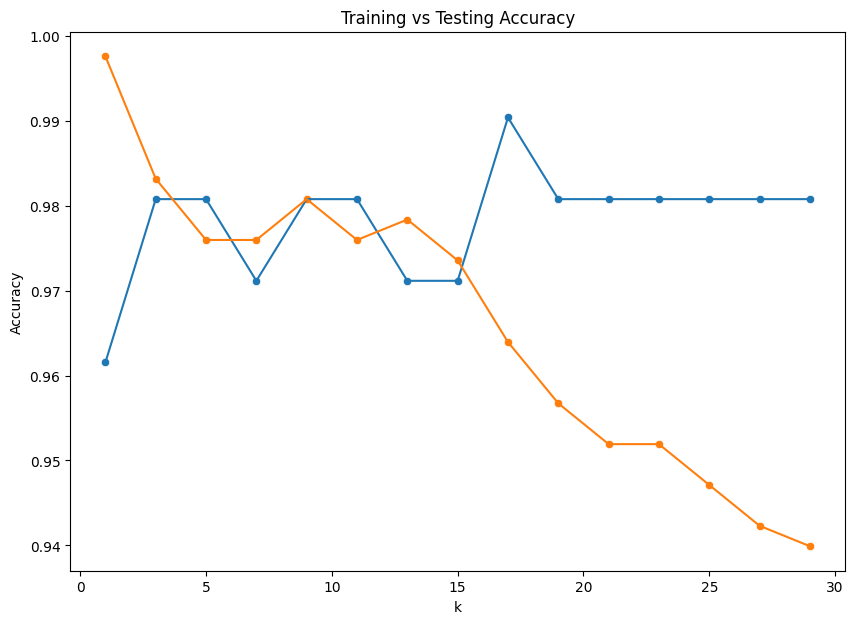

In [ ]:
plt.figure(figsize=(10,7))

sns.lineplot(x=k, y=testing_accuracies)
sns.scatterplot(x=k, y=testing_accuracies)

sns.lineplot(x=k, y=training_accuracies)
sns.scatterplot(x=k, y=training_accuracies)

plt.xlabel("k")
plt.ylabel("Accuracy")
plt.title("Training vs Testing Accuracy")
plt.show()

In [ ]:
print('best k:', best_k)
print('accuracy:', score)

best k: 17
accuracy: 0.9903846153846154


The best factor k for this case is 17 with 99.03 % accuracy. The performance improved again from 98.76% accuracy to 99.03% accuracy.

# Python Exercise : Decision Tree Clasiifier

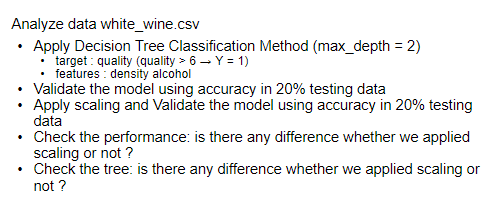

> ## Without Scaling

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
tree = DecisionTreeClassifier(
    criterion = 'gini',
    max_depth = 2
)
tree.fit(X_train,y_train)
y_predict_class = tree.predict(X_test)

In [ ]:
print('model accuracy in test dataset:',accuracy_score(y_test,y_predict_class))

model accuracy in test dataset: 0.9519230769230769


In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

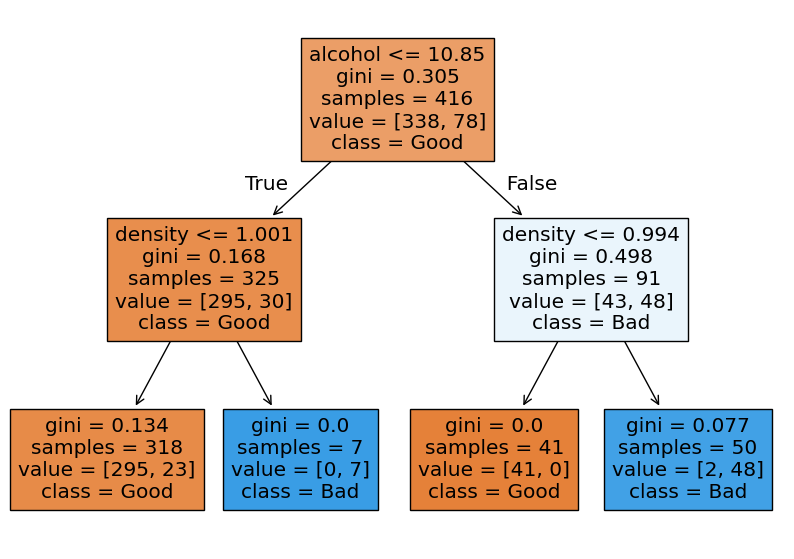

In [ ]:
plt.figure(figsize = (10,7))
plot_tree(tree, feature_names = list(X), class_names = ['Good','Bad'], filled = True)
plt.show()

> ## With Scaling

In [ ]:
tree = DecisionTreeClassifier(
    criterion = 'gini',
    max_depth = 2
)
tree.fit(X_train_scaled,y_train)
y_predict_class = tree.predict(X_test_scaled)

In [ ]:
print('model accuracy in test dataset:',accuracy_score(y_test,y_predict_class))

model accuracy in test dataset: 0.9519230769230769


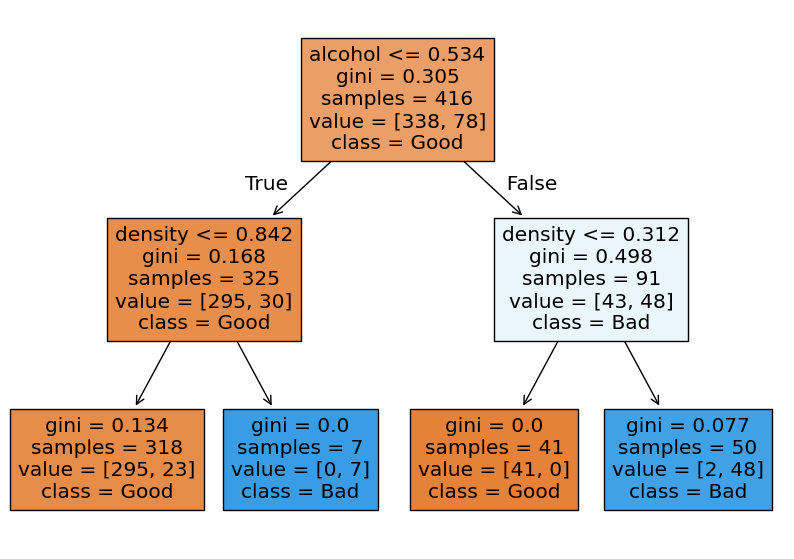

In [ ]:
plt.figure(figsize = (10,7))
plot_tree(tree, feature_names = list(X), class_names = ['Good','Bad'], filled = True)
plt.show()

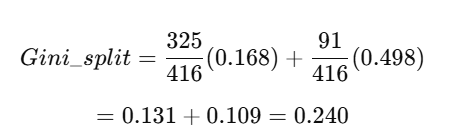

There is no difference in performance whether we applied scaling or not. Instead scaling make the tree harder to understand because the unit of variables change. The unit of alchohol is no longer in % and the unit in density is no longer in Kg/m^2.

  As comparison, it is easier to explain the rule in the first tree. In the first tree we can say that if there is a wine with the alcohol below 10.85 % and the density below 1.001 kg/m^2 the wine will be predicted as good quality wine. While in the second tree what we are able to say directly is if there is a wine with the standardize version of alcohol variable below 0.534 and the standardize version of density below 0.842 the wine will be predicted as good quality wine. The second one is much harder to understand.
